In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.integrate import quad

## Выборка

In [2]:
n = 50
p = 6
ksi = np.zeros((n, p-1))    # матрица наблюдений без 1

for i in range(n):
    ksi[i] = np.random.uniform(-1,1, p-1)

In [3]:
ksi

array([[ 0.4218707 , -0.01490294,  0.21761947,  0.68982394, -0.34001218],
       [-0.6356308 , -0.34664399,  0.86661355,  0.21204861, -0.69966917],
       [-0.95837708, -0.23977662, -0.38830248, -0.26502104,  0.57542505],
       [ 0.81707281,  0.53013904,  0.22061882, -0.52381073,  0.61104861],
       [ 0.202702  ,  0.16513936,  0.68059709,  0.36868823, -0.01326632],
       [-0.38226365,  0.07184435, -0.2669517 ,  0.08687917,  0.68796597],
       [-0.3831415 , -0.79470417,  0.28139012,  0.13985929, -0.04267765],
       [-0.19308998, -0.56295253, -0.95729492, -0.98940746,  0.53191273],
       [ 0.29162405,  0.19656449, -0.1846056 ,  0.34147724, -0.40407968],
       [ 0.05602613,  0.74934011, -0.57545717,  0.58658561, -0.16166639],
       [-0.65116575,  0.11237403, -0.75690734,  0.19796884, -0.58288698],
       [-0.10539435,  0.3640714 , -0.30789693,  0.63672038, -0.82800694],
       [-0.72900954,  0.87590991,  0.64143512, -0.38169991, -0.17820813],
       [ 0.79659163, -0.52007375,  0.9

In [4]:
KSI = np.vstack((np.ones(n),ksi.T)).T    # матрица наблюдений (с 1)

In [5]:
KSI

array([[ 1.        ,  0.4218707 , -0.01490294,  0.21761947,  0.68982394,
        -0.34001218],
       [ 1.        , -0.6356308 , -0.34664399,  0.86661355,  0.21204861,
        -0.69966917],
       [ 1.        , -0.95837708, -0.23977662, -0.38830248, -0.26502104,
         0.57542505],
       [ 1.        ,  0.81707281,  0.53013904,  0.22061882, -0.52381073,
         0.61104861],
       [ 1.        ,  0.202702  ,  0.16513936,  0.68059709,  0.36868823,
        -0.01326632],
       [ 1.        , -0.38226365,  0.07184435, -0.2669517 ,  0.08687917,
         0.68796597],
       [ 1.        , -0.3831415 , -0.79470417,  0.28139012,  0.13985929,
        -0.04267765],
       [ 1.        , -0.19308998, -0.56295253, -0.95729492, -0.98940746,
         0.53191273],
       [ 1.        ,  0.29162405,  0.19656449, -0.1846056 ,  0.34147724,
        -0.40407968],
       [ 1.        ,  0.05602613,  0.74934011, -0.57545717,  0.58658561,
        -0.16166639],
       [ 1.        , -0.65116575,  0.11237403, -0.

In [6]:
F = KSI.T@ KSI    # матрица Фишера

In [7]:
F_1 = np.linalg.inv(F)    # обратная матрица Фишера
F_1

array([[ 0.0215536 , -0.00037117, -0.00277321, -0.00865147,  0.00059851,
         0.00621219],
       [-0.00037117,  0.06129778, -0.01168294, -0.00706767, -0.00874275,
        -0.0031476 ],
       [-0.00277321, -0.01168294,  0.09196747,  0.00909251, -0.01073985,
         0.00094355],
       [-0.00865147, -0.00706767,  0.00909251,  0.07973539, -0.0064704 ,
        -0.0010735 ],
       [ 0.00059851, -0.00874275, -0.01073985, -0.0064704 ,  0.06867777,
         0.00732133],
       [ 0.00621219, -0.0031476 ,  0.00094355, -0.0010735 ,  0.00732133,
         0.06927638]])

In [8]:
fii = np.array([0.,0.,0.,0.,0.,0.])
for i in range(6):    
    fii[i] = F_1[i,i] 
fii    # диагональные эл-ты м Фишера

array([0.0215536 , 0.06129778, 0.09196747, 0.07973539, 0.06867777,
       0.06927638])

In [9]:
y = np.zeros(n)
for i in range(n):
    y[i] = 2 + 3 * ksi[i, 0] - 2* ksi[i, 1] + ksi[i, 2] + ksi[i, 3] - ksi[i, 4]
    y[i] = np.random.normal(y[i], 1.5)
y

array([ 5.02702887,  0.98470636, -1.16107196,  1.89892338,  3.43091854,
        0.23285356,  1.56039391,  2.4069079 ,  0.18547731,  0.57268733,
        1.32734548,  2.09390958, -0.443962  ,  6.42618159, -0.34946845,
       10.06012238,  4.44276194,  2.86386195,  6.66616889,  4.40142611,
       -0.28213073,  1.14549412,  3.06036243,  5.37999597, -0.38909485,
        5.87579951,  4.42822878,  4.65617577,  1.87628588,  2.7475774 ,
        1.18130704, -0.91325398,  5.04632284,  1.83127814, -0.63454085,
        3.69228625,  0.07961634,  2.21831806,  6.83974765,  6.35419301,
        0.1363002 , -0.14779749,  2.10137809,  1.06564337,  2.5855813 ,
       -1.59358902, -0.26087494, -2.32211527,  7.15290155,  2.59613382])

## a) Мультиколлинеарность

In [10]:
for j in range(5):
    model_j = LinearRegression()
    ksi_j = copy.copy(ksi)
    ksi_j.T[j] = 1
    model_j.fit(ksi_j, ksi[:, j])
    r_sq_j = model_j.score(ksi_j, ksi[:, j])    # коэф детерминации
    print(f"R_sq{j+1} = {r_sq_j.round(3)}")

R_sq1 = 0.059
R_sq2 = 0.055
R_sq3 = 0.027
R_sq4 = 0.061
R_sq5 = 0.013


Все R_sq < 0.7, значит кси_i не коррелируют

## b-c) Уравнение линейной регрессии, значимость коэф-тов, коэф детерминации

In [11]:
model = LinearRegression()
model.fit(ksi,y)

LinearRegression()

In [12]:
b = model.coef_
inter = model.intercept_

b = np.hstack((inter,b))    # коэф-ты линейнй регрессии

In [13]:
r_sq = model.score(ksi, y)    # коэф детерминации

In [14]:
y_predict = model.predict(ksi)    # прогноз выборки
y_predict

array([ 5.07673470e+00,  2.18182566e+00, -1.63927813e+00,  2.24462567e+00,
        3.18930848e+00,  4.22698360e-04,  2.83664933e+00,  3.67375314e-01,
        3.73375970e+00,  1.85571333e+00,  7.73806684e-01,  3.08025763e+00,
       -2.14449404e+00,  7.08996231e+00,  2.65809044e-03,  7.97558210e+00,
        4.66900767e+00,  3.18597608e+00,  5.46757119e+00,  5.29613565e+00,
        6.05737937e-01,  9.13120175e-01,  3.75237328e+00,  2.49549847e+00,
        9.60060692e-01,  4.95871589e+00,  3.55501013e+00,  4.69112772e+00,
        1.12964172e+00,  5.98123292e-01,  9.11524769e-01,  2.18237601e+00,
        4.08764128e+00,  3.76543517e+00, -1.57900124e+00,  2.07420714e+00,
        2.25502184e-01,  2.05954735e+00,  4.97313846e+00,  4.75046953e+00,
        7.75411691e-01, -1.77930828e-01,  9.55302144e-01,  8.91345019e-01,
        2.86239520e+00, -4.34643457e-01,  1.03861076e+00, -7.45229505e-01,
        7.73271344e+00,  2.88287849e+00])

In [15]:
TSS = 0     # дисперсия откликов
for i in range(n):
    TSS += (y[i] - y.mean())**2

print("TSS = ",TSS)

TSS =  355.29912838206303


In [16]:
RSS = (1 - r_sq) * TSS  # остаточная сумма квадратов
print("RSS = ", RSS)

RSS =  83.33360400178934


In [17]:
# проверка значимости коэф-тов
delta = np.array([0.,0.,0.,0.,0.,0.])
for i in range(6):
    delta[i] = b[i] * (n-6)**0.5 / ((RSS * fii[i] ) ** 0.5)

delta     # 

array([10.81356982,  9.49431274, -4.76913798,  0.4317992 ,  4.10713493,
       -3.56612929])

delta = 9.03 -> значим;
delta = 9.15 -> значим;
delta = -4.6 -> значим;
delta = 3.0 -> значим;
delta = 0.7 -> не значим;
delta = -5.4 -> значим;

In [18]:
b # коэфф-ты регрессии

array([ 2.18480515,  3.23496545, -1.99040174,  0.16779968,  1.48125834,
       -1.29173499])

 все коэф-ты значимы

In [19]:
r_sq.round(4)

0.7655

In [20]:
delta_regressii = (r_sq / (1-r_sq) )* ((n-6) / (6-1))

In [21]:
delta_regressii.round(4)

28.7195

 p_value стремится к нулю => отвергаем H_0, т е регрессия значима

## d) x_i = 0, доверительный интервал с gamma = 0.95

In [22]:
y_new = b[0]
y_new

2.1848051458586837

In [23]:
new_KSI = np.array([1.,0.,0.,0.,0.,0.])
t_0975 = 2.02
new_delta = t_0975 * (1 + new_KSI @ F_1 @ new_KSI.T)

In [24]:
new_delta

2.063538265590053

In [25]:
dov_interval = (round(y_new - new_delta, 4), round(y_new + new_delta, 4))   # доверительнй интервал

In [26]:
dov_interval

(0.1213, 4.2483)

## e) Предположние о независимости ошибок измерения

In [27]:
e = np.ones((1,n))    # вектор ошибок в эксперименте

for i in range(n):
    e[0,i] = y[i] - y_predict[i]
e

array([[-0.04970582, -1.1971193 ,  0.47820617, -0.34570229,  0.24161006,
         0.23243086, -1.27625541,  2.03953258, -3.54828239, -1.283026  ,
         0.5535388 , -0.98634806,  1.70053204, -0.66378072, -0.35212654,
         2.08454027, -0.22624573, -0.32211413,  1.19859769, -0.89470954,
        -0.88786867,  0.23237394, -0.69201085,  2.8844975 , -1.34915554,
         0.91708362,  0.87321864, -0.03495196,  0.74664416,  2.14945411,
         0.26978227, -3.09562999,  0.95868157, -1.93415703,  0.94446039,
         1.61807912, -0.14588585,  0.15877072,  1.86660919,  1.60372348,
        -0.63911149,  0.03013334,  1.14607595,  0.17429835, -0.2768139 ,
        -1.15894556, -1.2994857 , -1.57688577, -0.57981189, -0.28674467]])

In [28]:
I = np.zeros(n)
for i in range(n-1):
    for j in range(i+1,n):
        if e[0,i] > e[0,j]:
            I[i] +=1
            
il = I.sum()    # число инверсий в е

In [29]:
delta_nezavisimosti = (il - n*(n-1)/4) /((n**3/36)**0.5)

In [30]:
delta_nezavisimosti

-0.05939696961966999

p_value_nezavisimosti равно 0.2 cледовательно нет оснований отвергнуть H_0, следовательно ошибки измерения независимы

## f) Предположение о нормальности распределения ошибок

In [31]:
# проверяем гипотезу о том, что вектор ошибок e распределён по номральному закону
e = np.transpose(e)
e

array([[-0.04970582],
       [-1.1971193 ],
       [ 0.47820617],
       [-0.34570229],
       [ 0.24161006],
       [ 0.23243086],
       [-1.27625541],
       [ 2.03953258],
       [-3.54828239],
       [-1.283026  ],
       [ 0.5535388 ],
       [-0.98634806],
       [ 1.70053204],
       [-0.66378072],
       [-0.35212654],
       [ 2.08454027],
       [-0.22624573],
       [-0.32211413],
       [ 1.19859769],
       [-0.89470954],
       [-0.88786867],
       [ 0.23237394],
       [-0.69201085],
       [ 2.8844975 ],
       [-1.34915554],
       [ 0.91708362],
       [ 0.87321864],
       [-0.03495196],
       [ 0.74664416],
       [ 2.14945411],
       [ 0.26978227],
       [-3.09562999],
       [ 0.95868157],
       [-1.93415703],
       [ 0.94446039],
       [ 1.61807912],
       [-0.14588585],
       [ 0.15877072],
       [ 1.86660919],
       [ 1.60372348],
       [-0.63911149],
       [ 0.03013334],
       [ 1.14607595],
       [ 0.17429835],
       [-0.2768139 ],
       [-1

In [32]:
def F_empir(sample, prom):
    n = len(sample)
    xx = prom
    F_tilda = np.array([len(np.where(sample < num)[0])/n for num in xx])
    return F_tilda

def NormDistribution_px(x, a, s2):
        return (1/np.sqrt(2 * np.pi * s2) * np.exp(-1 * (x - a)**2 / (2*s2)))

def NormDistribution_Fx(x, a, s2):
    i, e = quad(NormDistribution_px, -np.inf, x, args=(a,s2))
    return i

оценки параметров нормальной модели: 
a = -2.486899575160351e-16, s2 = 1.6666720800357862
delta = 0.47525176312619744


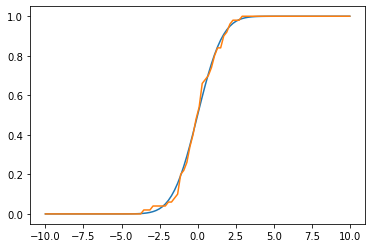

In [33]:
# 1) оценка параметров по выборке
a1 = e.mean()
a2 = (e**2).mean()

a = a1
s2 = a2 - a1**2
print(f"оценки параметров нормальной модели: \na = {a}, s2 = {s2}")

#посчитаем значение критерия
Nnods = 100
xx = np.linspace(-10, 10, Nnods)
F_tilda = F_empir(e, xx)
F = np.array([NormDistribution_Fx(xx[i], a, s2) for i in np.arange(Nnods)])

delta_tilda = np.sqrt(n) * (np.abs(F - F_tilda)).max()
print("delta =", delta_tilda)

plt.plot(xx, F)
plt.plot(xx, F_tilda)

In [34]:
# бутстрап

N_but = 10000
delta_list = np.empty(N_but)

Nnods = 100
xx_star = np.linspace(-10, 10, Nnods)

for but_iter in np.arange(N_but):
    # реализуем новую выборку согласно посчитанному закону распределения
    xstar = np.random.normal(a, s2, n)

    a_star = xstar.mean()
    s2_star = (xstar**2).mean() - a_star**2

    
    #построение эмпирической функции распределения
    F_tilda = F_empir(xstar, xx_star)
    #теоретическая ф-ия распределения с данными параметрами
    F = np.array([NormDistribution_Fx(xx_star[i], a_star, s2_star) for i in np.arange(Nnods)])

    delta_star = np.sqrt(n) * (np.abs(F - F_tilda)).max()
    delta_list[but_iter] = delta_star

delta_list = np.array(delta_list)


In [35]:
delta_list

array([0.40126901, 0.54695562, 0.68928076, 0.54669773, 0.33778556,
       0.97115332, 0.64008369, 0.30661713, 0.4137278 , 0.33098442,
       0.47664864, 0.62328134, 0.50274257, 0.36227449, 0.63597012,
       0.4700961 , 0.39874842, 0.67734274, 0.50345891, 0.7899791 ,
       0.68674958, 0.35906522, 0.52292794, 0.46614173, 0.47932629,
       0.65497932, 0.51265214, 0.45660061, 0.47174522, 0.55536634,
       0.54114753, 0.44687454, 0.60718509, 0.63463605, 0.56560381,
       0.41718479, 0.43899682, 0.70559053, 0.44563086, 0.55348581,
       0.36879427, 0.51830075, 0.53969986, 0.46320639, 0.3866955 ,
       0.56386611, 0.36144755, 0.73816967, 0.4483432 , 0.33932356,
       0.32967276, 0.67156243, 0.52217835, 0.40379587, 0.3539047 ,
       0.4802091 , 0.45029083, 0.42407674, 0.54330874, 0.57523555,
       0.33619015, 0.35369057, 0.78391543, 0.55185545, 0.42149558,
       0.62540491, 0.46271989, 0.7854105 , 0.53479508, 0.99469286,
       0.32700528, 0.60095556, 0.47646772, 0.44321866, 0.56509

k = 237
p_value =  0.528
нет оснований отвергнуть гипотезу о нормальном распределении ошибок


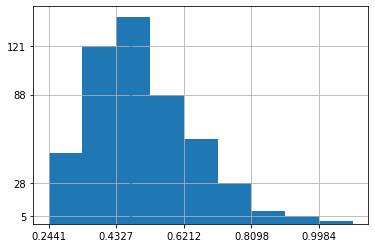

In [36]:
delta_list = np.sort(delta_list)

k = 1
for i in np.arange(1, N_but):
    if (delta_list[i-1] < delta_tilda) and (delta_tilda <= delta_list[i]):
        k = i
        break 
        
p_value = 1 - (k-1)/N_but
print("k =",k)
print("p_value = ", p_value)

alpha = 0.05
if p_value > alpha:
    print("нет оснований отвергнуть гипотезу о нормальном распределении ошибок")
else:
    print("отвергаем гипотезу о нормальном распределении ошибок ")

khist = int(1 + np.trunc(np.log2(N_but)))
hist = np.histogram(delta_list, khist)

plt.hist(delta_list, khist)
plt.grid()
plt.yticks([hist[0][i] for i in range(1,khist,2)])
plt.xticks([hist[1][i] for i in range(0,khist,2)])
plt.vlines(delta_tilda, 0, hist[0].max())

## h) Кросс-проверка

In [37]:
ksi1 = copy.copy(ksi)
y1 = copy.copy(y)
ksi_i = np.delete(ksi1,1,0)
y_i = np.delete(y1,1,0)
#np.shape(y_i)

In [38]:
CVSS = 0
for i in range(n):
    ksi1 = copy.copy(ksi)
    y1 = copy.copy(y)
    ksi_i = np.delete(ksi1,i,0)
    y_i = np.delete(y1,i,0)
    model_i = LinearRegression()
    model_i.fit(ksi_i, y_i)
    b_i = model_i.coef_
    inter_i = model_i.intercept_
    b_i = np.hstack((inter_i,b_i)) 
    CVSS += (y[i]- KSI[i] @ b_i.T)**2

In [39]:
CVSS.round(4)

105.9551

In [40]:
R2_CVSS = (TSS - CVSS) / TSS

In [41]:
R2_CVSS.round(4)

0.7018

меньше чем R2, но сравнима с ней, значит наша модель, хорошо предсказывает

## i) Адекватность регрессии (5 повторных измерений в 1ой точке)

In [42]:
y_5 = np.zeros(5)
for i in range(5):
    y_5[i] = np.random.normal(4., 1.5)    # х_i = 1
y_5

array([4.62434075, 4.80853846, 6.13062834, 2.31664073, 6.03998452])

In [43]:
sigma_star_sq = 1 / (5-1) * sum([(y_5[i] - y_5.mean())**2 for i in range(5)])
sigma_star_sq.round(4)

2.3762

In [44]:
print(RSS <= (5-1)*sigma_star_sq)

False


In [45]:
delta_5 = RSS/((n-6)*sigma_star_sq)
delta_5.round(4)

0.797

Критическое значение р Фишера(44,4) = 5.7 => p-value > 0.05 => нет оснований отвергнуть H_0 => сигмы одинаковы

## j) Ур линейной регрессии без 4ого фактора

In [46]:
model_1 = LinearRegression()

ksi1 = copy.copy(ksi)
ksi_1 = np.delete(ksi1, 3, 1)
y_1 = np.zeros(n)
for i in range(n):
    y_1[i] = 2 + 3 * ksi_1[i, 0] - 2* ksi_1[i, 1] + ksi_1[i, 2] - ksi_1[i, 3]
    y_1[i] = np.random.normal(y_1[i], 1.5)

model_1.fit(ksi_1, y_1)
b_1 = model_1.coef_
inter_1 = model_1.intercept_
b_1 = np.hstack((inter_1,b_1)) 

b_1

array([ 2.01009709,  3.10753537, -1.4956971 ,  0.75412548, -1.43225013])

In [47]:
r_sq_1 = model_1.score(ksi_1, y_1)
print('R2',r_sq_1)
TSS_1 = 0     # дисперсия откликов
for i in range(n):
    TSS_1 += (y_1[i] - y_1.mean())**2

RSS_1 = (1 - r_sq_1) * TSS_1  # остаточная сумма квадратов

KSI_1 = np.vstack((np.ones(n), ksi_1.T)).T    # матрица наблюдений (с 1)
F1 = KSI_1.T@ KSI_1    # матрица Фишера
F1_1 = np.linalg.inv(F1)    # обратная матрица Фишера
fii_1 = np.array([0.,0.,0.,0.,0.,0.])
for i in range(5):    
    fii_1[i] = F1_1[i,i] 

delta_1 = np.array([0.,0.,0.,0.,0.])
for i in range(5):
    delta_1[i] = b_1[i] * (n-5)**0.5 / ((RSS_1 * fii_1[i] ) ** 0.5)

delta_1     

R2 0.667747298958059


array([ 8.94918885,  8.27840306, -3.25313948,  1.75209868, -3.57651915])

все значимы

In [48]:
delta_regressii_1 = r_sq_1 / (1-r_sq_1) * (n-5) / (5-1)
delta_regressii_1.round(4)

22.6098

 p_value стремится к нулю => отвергаем H_0, т е регрессия значима

## k) Bootstrap 

In [49]:
yy = np.zeros((n,1))
for i in range(n):
    yy[i] = y[i]
print(np.shape(yy))
print(np.shape(y))
np.shape(ksi)


(50, 1)
(50,)


(50, 5)

In [50]:
deltas_star = np.zeros(1000)
for k in range(1000):
    X_Y = np.zeros((n, 6))
    ksi_y = np.hstack((yy,ksi))
    for i in range(n):
        X_Y[i] = random.choices(ksi_y[i], k=6)
        
    model_k = LinearRegression()
    model_k.fit(X_Y[:, 1:], X_Y[:, 0])

    r_sq_k = model_k.score(X_Y[:, 1:], X_Y[:, 0])
    
    
    model_k1 = LinearRegression()
    ksi_k1 = np.delete(ksi,3,1)
    y_k1 = np.zeros(n)
    for i in range(n):
        y_k1[i] = 2 + 3 * ksi_k1[i, 0] - 2* ksi_k1[i, 1] + ksi_k1[i, 2] - ksi_k1[i, 3]
        y_k1[i] = np.random.normal(y_k1[i], 1.5)
    model_k1.fit(ksi_k1, y_k1)

    r_sq_k1 = model_k1.score(ksi_k1, y_k1)
    deltas_star[k] = r_sq_k - r_sq_k1
deltas_star    

array([-0.45846772, -0.55298886, -0.50868755, -0.4954669 , -0.49000748,
       -0.4497889 ,  0.0464712 , -0.13124495, -0.19986102, -0.31281279,
       -0.60982399, -0.39243532, -0.61496128, -0.32932607, -0.30156565,
       -0.63041817, -0.58619482, -0.41836498, -0.62274146, -0.43203953,
       -0.27504177, -0.56913363,  0.10789054, -0.6427311 , -0.64357103,
       -0.64243595, -0.56667165, -0.53401763, -0.44301571, -0.62861472,
       -0.50887088, -0.25779956, -0.52580529, -0.38785065, -0.23146438,
       -0.48127854,  0.03511482, -0.27941206, -0.19499438, -0.08263885,
       -0.13737734, -0.5519014 , -0.39511131, -0.64755085, -0.33676413,
       -0.37361477, -0.13706916, -0.2631183 , -0.48785686, -0.61155346,
       -0.61086984, -0.34950226, -0.3031685 , -0.55382637, -0.63195672,
       -0.33708465, -0.59318348, -0.12053368, -0.25344748, -0.42216236,
       -0.55015879, -0.47669419, -0.51392764, -0.57534828, -0.58237112,
       -0.38746732, -0.61009634, -0.23078623, -0.50587316, -0.08

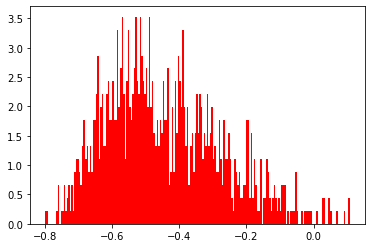

In [51]:
deltas_star = sorted(deltas_star)
n, bins, patches = plt.hist(deltas_star, 200, density = 1, facecolor = 'r', alpha = 1)

In [52]:
delta = r_sq - r_sq_1
delta.round(4)

0.0977

так как deltas_star < 0, то H1 отвергаем сразу, значит нет оснований отвергнуть Н0. Те усложнение модели не оправдано